# **New York City Crash Predictor**
**Ankita Kalkar, Noah Burget, & Amy Crider**

CIS 545 Fall 2023

In [ ]:
##########
# Notebook for CIS 5450 course project
# NYC Crash Predictor
##########

# Initial Notebook Set Up

Performs library imports, reads in data file, and checks number of lines in uncleaned data. Since the number is well over 2,000,000, we can assume we will be able to clean data in such a way that final version will still have at least 50,000 lines. We also import a variety of libraries we will need as we work with the data and build our model.

In [ ]:
##### Library imports
# Google Colab mounting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Standard data science and plotting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import random

# sklearn ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Mounted at /content/drive


In [ ]:
# Read in raw datafile, a comma-separated value (CSV) file.
# This is the path for the data on Noah's drive
raw_data = pd.read_csv('/content/drive/MyDrive/data/New_York_Motor_Vehicle_Collisions-Crashes_from_july_2012_to_August_2023.csv')

<ipython-input-6-56780a0d6b7f>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('/content/drive/MyDrive/data/New_York_Motor_Vehicle_Collisions-Crashes_from_july_2012_to_August_2023.csv')


In [ ]:
#Number of rows included in uncleaned data file
len(raw_data)

2022581

# I: Data Wrangling, Exploration, and Preparation for Modeling
### Here, we will perform EDA and get the data into a form fit for modeling. We will perform feature engineering to add additional information to our training dataset, such as:
* **Traffic Data** based on location and time
* **Proximity to Tourist Attractions** in NYC or a given borough that could draw extra people or cause unsafe situations from coordinate information
* **Weather** from date, time and coordinate information

## Importing the dataset and initial EDA

In [ ]:
# Look at the dataframe
# The data looks OK already
raw_data

,Unnamed: 0,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,1923971,2012-07-01,2:50,BRONX,10451,40.825578,-73.918460,"(40.8255779, -73.9184596)",EAST 161 STREET,MORRIS AVENUE,...,Unspecified,NaN,NaN,NaN,85182,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1,1921212,2012-07-01,19:30,BROOKLYN,11238,40.683039,-73.964777,"(40.6830392, -73.9647775)",FULTON STREET,WASHINGTON AVENUE,...,Unspecified,NaN,NaN,NaN,191551,SPORT UTILITY / STATION WAGON,TAXI,NaN,NaN,NaN
2,1923909,2012-07-01,14:14,MANHATTAN,10003,40.731166,-73.991921,"(40.7311655, -73.9919214)",BROADWAY,EAST 9 STREET,...,Unspecified,NaN,NaN,NaN,9409,TAXI,BICYCLE,NaN,NaN,NaN
3,1921229,2012-07-01,3:58,MANHATTAN,10002,40.721986,-73.985515,"(40.7219864, -73.9855153)",EAST HOUSTON STREET,NORFOLK STREET,...,Passenger Distraction,NaN,NaN,NaN,12176,PASSENGER VEHICLE,LIVERY VEHICLE,NaN,NaN,NaN
4,1923914,2012-07-01,18:37,MANHATTAN,10026,40.797097,-73.949747,"(40.7970973, -73.9497466)",WEST 110 STREET,DUKE ELLINGTON CIRCLE,...,NaN,NaN,NaN,NaN,63606,TAXI,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022576,1959762,2023-08-31,23:26,BROOKLYN,11201.0,40.696243,-73.990040,"(40.696243, -73.99004)",CADMAN PLAZA EAST,TILLARY STREET,...,NaN,NaN,NaN,NaN,4658763,Pick-up Truck,NaN,NaN,NaN,NaN
2022577,1962068,2023-08-31,20:16,QUEENS,11692.0,40.590736,-73.795950,"(40.590736, -73.79595)",ROCKAWAY BEACH BOULEVARD,BEACH 67 STREET,...,NaN,NaN,NaN,NaN,4659703,Sedan,NaN,NaN,NaN,NaN
2022578,1959261,2023-08-31,0:10,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,...,Unspecified,NaN,NaN,NaN,4658793,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2022579,1959242,2023-08-31,10:30,QUEENS,11416.0,40.683086,-73.854160,"(40.683086, -73.85416)",86 STREET,ROCKAWAY BOULEVARD,...,Unspecified,NaN,NaN,NaN,4658471,Sedan,Sedan,NaN,NaN,NaN


In [ ]:
# Count of NA items in each column
raw_data.isnull().sum()

Unnamed: 0                             0
CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           629199
ZIP CODE                          629438
LATITUDE                          230024
LONGITUDE                         230024
LOCATION                          230024
ON STREET NAME                    426043
CROSS STREET NAME                 757780
OFF STREET NAME                  1688911
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6371
CONTRIBUTING FACTOR VEHICLE 2     308840
CONTRIBUTING FACTOR VEHICLE 3    1879034
CONTRIBUTING FACTOR VEHICLE 4    1990355
CONTRIBUTING FACTOR VEHICLE 5    2013875
COLLISION_ID    

After doing some initial checks and counting on our raw data, we can start to get a better idea of what we are working with via visualizations that help us understand the data better! In this missing values heatmap, we can immediately see which columns have large numbers of rows with missing data. It makes it quite clear that our accident dataset has very few accidents that involved more than two vehicles, due to the large number of rows with no data for vehicle 3, 4, or 5. We can also see other columns with less frequent missing data (borough, off street name, etc.) This is information we will consider when we move into cleaning and wrangling our data.

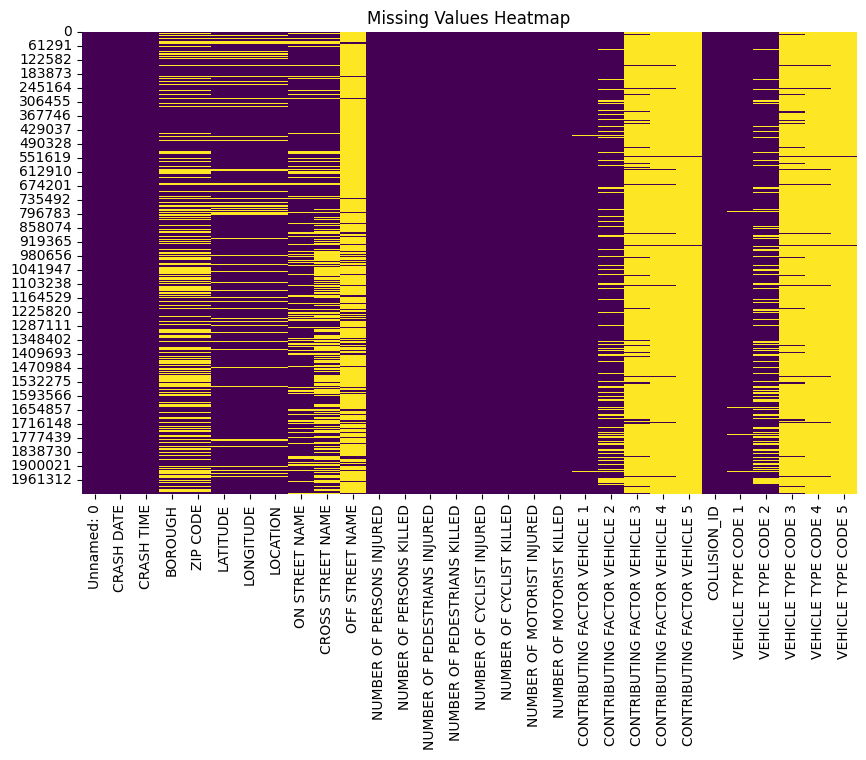

In [ ]:
# Visualization of the missing values by column - makes it clear that very few accidents involved more than 2 vehicles!
plt.figure(figsize=(10, 6))
sns.heatmap(raw_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Knowing the datatype of each of our columns also gives us greater direction in our wrangling process - we can see that we may want to adapt our crash date and time columns into the DateTime format to give us more options when working with that data. Our zip code column may need to be made into a numberic value for simplicity (depending on the way we choose to use it), or we may leave it a string. Other considerations may be taken into account as well as we begin our work with the data, but looking at this information initially gives us a starting point.

In [ ]:
# Datatypes for columns
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022581 entries, 0 to 2022580
Data columns (total 30 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Unnamed: 0                     int64  
 1   CRASH DATE                     object 
 2   CRASH TIME                     object 
 3   BOROUGH                        object 
 4   ZIP CODE                       object 
 5   LATITUDE                       float64
 6   LONGITUDE                      float64
 7   LOCATION                       object 
 8   ON STREET NAME                 object 
 9   CROSS STREET NAME              object 
 10  OFF STREET NAME                object 
 11  NUMBER OF PERSONS INJURED      float64
 12  NUMBER OF PERSONS KILLED       float64
 13  NUMBER OF PEDESTRIANS INJURED  int64  
 14  NUMBER OF PEDESTRIANS KILLED   int64  
 15  NUMBER OF CYCLIST INJURED      int64  
 16  NUMBER OF CYCLIST KILLED       int64  
 17  NUMBER OF MOTORIST INJURED     int64  
 18  NU

Taking a look at the number of unique values in each columns allows us to verify that all 5 New York City boroughs are, in fact, included in this dataset, as well as giving us another picture of how many unique values we need to consider throughout our work.

In [ ]:
# Number of unique values in each column - we can confirm that all 5 boroughs are present in the dataset
raw_data.nunique()

Unnamed: 0                       2022581
CRASH DATE                          4079
CRASH TIME                          1440
BOROUGH                                5
ZIP CODE                             609
LATITUDE                          125816
LONGITUDE                          97873
LOCATION                          274779
ON STREET NAME                     18041
CROSS STREET NAME                  20064
OFF STREET NAME                   216217
NUMBER OF PERSONS INJURED             31
NUMBER OF PERSONS KILLED               7
NUMBER OF PEDESTRIANS INJURED         14
NUMBER OF PEDESTRIANS KILLED           4
NUMBER OF CYCLIST INJURED              5
NUMBER OF CYCLIST KILLED               3
NUMBER OF MOTORIST INJURED            30
NUMBER OF MOTORIST KILLED              6
CONTRIBUTING FACTOR VEHICLE 1         61
CONTRIBUTING FACTOR VEHICLE 2         61
CONTRIBUTING FACTOR VEHICLE 3         51
CONTRIBUTING FACTOR VEHICLE 4         41
CONTRIBUTING FACTOR VEHICLE 5         30
COLLISION_ID    

Checking for duplicates allows us to see whether our data might be unbalanced or somehow skewed due to repeating data. The results show not one duplicate line within the dataset!

In [ ]:
# Check for duplicated rows in the dataframe
raw_data.duplicated().value_counts()

False    2022581
dtype: int64

The describe function gives us more detail, statistically, about our data. We can only see these statistics for our numeric columns, but it allows us to consider this information moving forward.

In [ ]:
# Descriptive statistics of the dataset
raw_data.describe()

,Unnamed: 0,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,2.022581e+06,1.792557e+06,1.792557e+06,2.022563e+06,2.022550e+06,2.022581e+06,2.022581e+06,2.022581e+06,2.022581e+06,2.022581e+06,2.022581e+06,2.022581e+06
mean,1.011321e+06,4.062780e+01,-7.375233e+01,3.030694e-01,1.451138e-03,5.523042e-02,7.258053e-04,2.621848e-02,1.117384e-04,2.184288e-01,5.937957e-04,3.119757e+06
std,5.839216e+05,1.980561e+00,3.726679e+00,6.944237e-01,4.013982e-02,2.414764e-01,2.742221e-02,1.617160e-01,1.061672e-02,6.555700e-01,2.657387e-02,1.504072e+06
min,0.000000e+00,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,5.056450e+05,4.066792e+01,-7.397492e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.141765e+06
50%,1.011290e+06,4.072100e+01,-7.392732e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.647515e+06
75%,1.516935e+06,4.076960e+01,-7.386667e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.153408e+06
max,2.023616e+06,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.660420e+06


In this graph, we can see the balance of our dataset among the five New York City boroughs (one potential important variable for our model), and we can see quickly that the data is very imbalanced across this column. Brooklyn has a much higher number of reported accidents than Staten Island, with the other 3 boroughs falling at various points in between. We will need to take this into account as we build our model to avoid misleading or incorrect predictions.

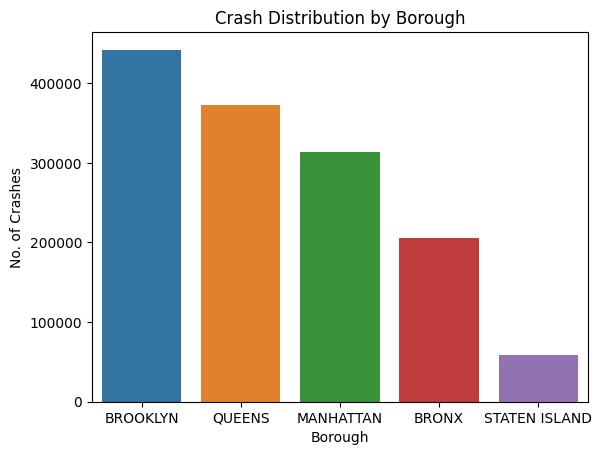

In [ ]:
# Distribution of boroughs in dataset: very imbalanced!
borough_dist = raw_data['BOROUGH'].value_counts()
sns.barplot(x=borough_dist.index, y=borough_dist.values)
plt.title('Crash Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('No. of Crashes')
plt.show()


Here we are looking at the 25 most commonly referenced street names in the On Street Name column. This helps us to get an idea of both which streets are most dangerous or likely to have accidents, but also whether any particular streets are outliers with significantly more references than others. We can see that there are a few streets that are much more commonly occurring in the data, and the way that references to streets falls in the top 25 list.

In [ ]:
# What are the most dangerous/busiest streets? (Counting unique values in street name columns)
raw_data['ON STREET NAME'].value_counts().head(25)

BROADWAY                            17277
ATLANTIC AVENUE                     15322
BELT PARKWAY                        13543
3 AVENUE                            12476
NORTHERN BOULEVARD                  11965
LONG ISLAND EXPRESSWAY               9928
BROOKLYN QUEENS EXPRESSWAY           9743
FLATBUSH AVENUE                      9741
LINDEN BOULEVARD                     9587
QUEENS BOULEVARD                     9368
2 AVENUE                             9010
GRAND CENTRAL PKWY                   8440
BRUCKNER BOULEVARD                   8190
FDR DRIVE                            7519
5 AVENUE                             6767
JAMAICA AVENUE                       6746
MAJOR DEEGAN EXPRESSWAY              6186
CROSS BRONX EXPY                     6051
7 AVENUE                             5975
8 AVENUE                             5923
HYLAN BOULEVARD                      5907
CROSS ISLAND PARKWAY                 5884
1 AVENUE                             5734
PARK AVENUE                       

In the next three code blocks, we pulled information to look at the distribution of vehicle types and contributing factors in all of those columns. We are eventually hoping to attempt to clean up those columns and make sure the vehicle types and contributing factors are all uniformly formatted, and knowing what data those columns already contain is an important starting point for moving ahead in the data cleaning process.

In [ ]:
# Distribution of contributing factors (vehicle 1)
raw_data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().to_csv('vehicle1_contributingFactor.csv')

In [ ]:
# Distribution of vehicle type for all vehicles
all_vehicles = np.ravel(raw_data[['VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5']])
pd.Series(all_vehicles).value_counts().to_csv('allVehicles_type.csv')

In [ ]:
# Distribution of contributing factors to the crash for all vehicles involved
all_factors = np.ravel(raw_data[['CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5']])
pd.Series(all_factors).value_counts().to_csv('allContributingFactors.csv')

In this graph, we looked at the distribution of our data across the days of the week. Clearly the dataset is fairly well balanced across the days of the week, with only Saturday and Sunday being slightly lower than on the other days of the week. This is important to note as we look into dates and times of accidents with our model.

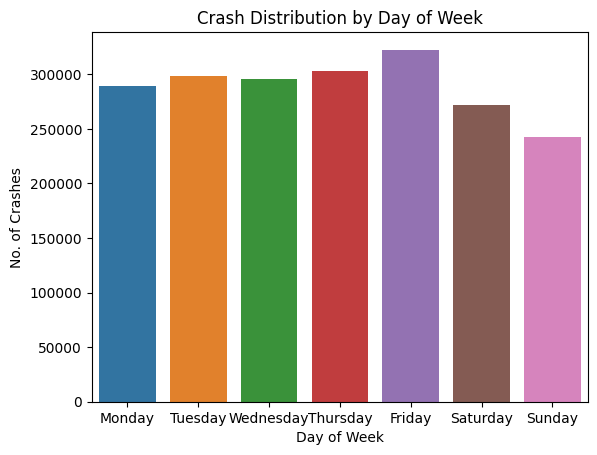

In [ ]:
# Convert dates into days of the week and look at distribution - pretty balanced across all days (satursay & sunday a bit lower)
# Monday = 0, Sunday = 6
raw_data['CRASH_DAYOFWEEK'] = raw_data['CRASH DATE'].astype('datetime64[ns]').dt.dayofweek
day_dist = raw_data['CRASH_DAYOFWEEK'].value_counts()
sns.barplot(x=day_dist.index, y=day_dist.values)
plt.xticks(ticks=range(0,7), labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Crash Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('No. of Crashes')
plt.show()

Like the previous graph, this allows us to consider how our data is distributed across the 24 hours in the day. Since we are considering doing some work with this variable in our model, we need to know how balanced it is. This data clearly has a wide range, which makes sense given knowledge of human driving behavior.

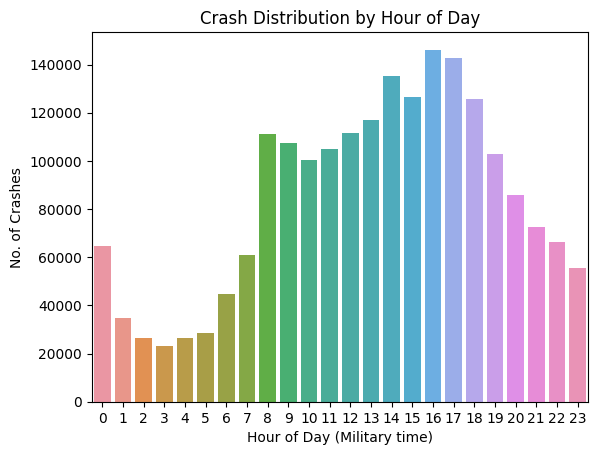

In [ ]:
# Truncate times to the hour and look at distribution
raw_data['CRASH_HOUR'] = raw_data['CRASH TIME'].astype('datetime64[ns]').dt.hour
hour_dist = raw_data['CRASH_HOUR'].value_counts()
sns.barplot(x=hour_dist.index, y=hour_dist.values)
plt.title('Crash Distribution by Hour of Day')
plt.xlabel('Hour of Day (Military time)')
plt.ylabel('No. of Crashes')
plt.show()

Here we clean up leading and trailing whitespace on our street name data. This was caught due to repeat intersections appearing in the list when we first looked at this data. After the data is cleaned, we can see which intersections (a unique combination of an on street and cross street) occur in the data. Again, we look at the top 25 of these results to see the busiest and most dangerous intersections occuring in the data.

In [ ]:
### What are the most dangerous/busiest intersections? (Counting unique combinations of on street and cross street names)
# Remove leading/trailing spaces in street names - caught this due to repeat intersections appearing
raw_data['ON STREET NAME'] = raw_data['ON STREET NAME'].str.strip()
raw_data['CROSS STREET NAME'] = raw_data['CROSS STREET NAME'].str.strip()
raw_data[['ON STREET NAME', 'CROSS STREET NAME']].value_counts().head(25)

ON STREET NAME             CROSS STREET NAME        
ROCKAWAY BOULEVARD         BROOKVILLE BOULEVARD         723
FLATBUSH AVENUE            GRAND ARMY PLAZA             693
WEST FORDHAM ROAD          MAJOR DEEGAN EXPRESSWAY      689
TILLARY STREET             FLATBUSH AVENUE EXTENSION    604
BRUCKNER BOULEVARD         EAST 138 STREET              596
FLATBUSH AVENUE EXTENSION  TILLARY STREET               577
EAST 59 STREET             2 AVENUE                     504
BRUCKNER BOULEVARD         HUNTS POINT AVENUE           496
ATLANTIC AVENUE            LOGAN STREET                 490
WEST 42 STREET             8 AVENUE                     488
EAST 138 STREET            BRUCKNER BOULEVARD           469
QUEENS BOULEVARD           WOODHAVEN BOULEVARD          466
PENNSYLVANIA AVENUE        LINDEN BOULEVARD             449
EAST 125 STREET            2 AVENUE                     443
EAST 37 STREET             3 AVENUE                     436
PENNSYLVANIA AVENUE        ATLANTIC AVENUE     

This correlation matrix allows us to visualize the correlations between different columns in our data. Most columns seem to have very little or no correlation - which is great for model building, as we want our models to find novel connections between features - but there are some that have a stronger positive correlation and others with a negative correlation. We expect to see a positive correlation between columns like the numbers of people injured and or killed, so those correlations do match expectations.

<ipython-input-23-da0274bd1e50>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = raw_data.corr()


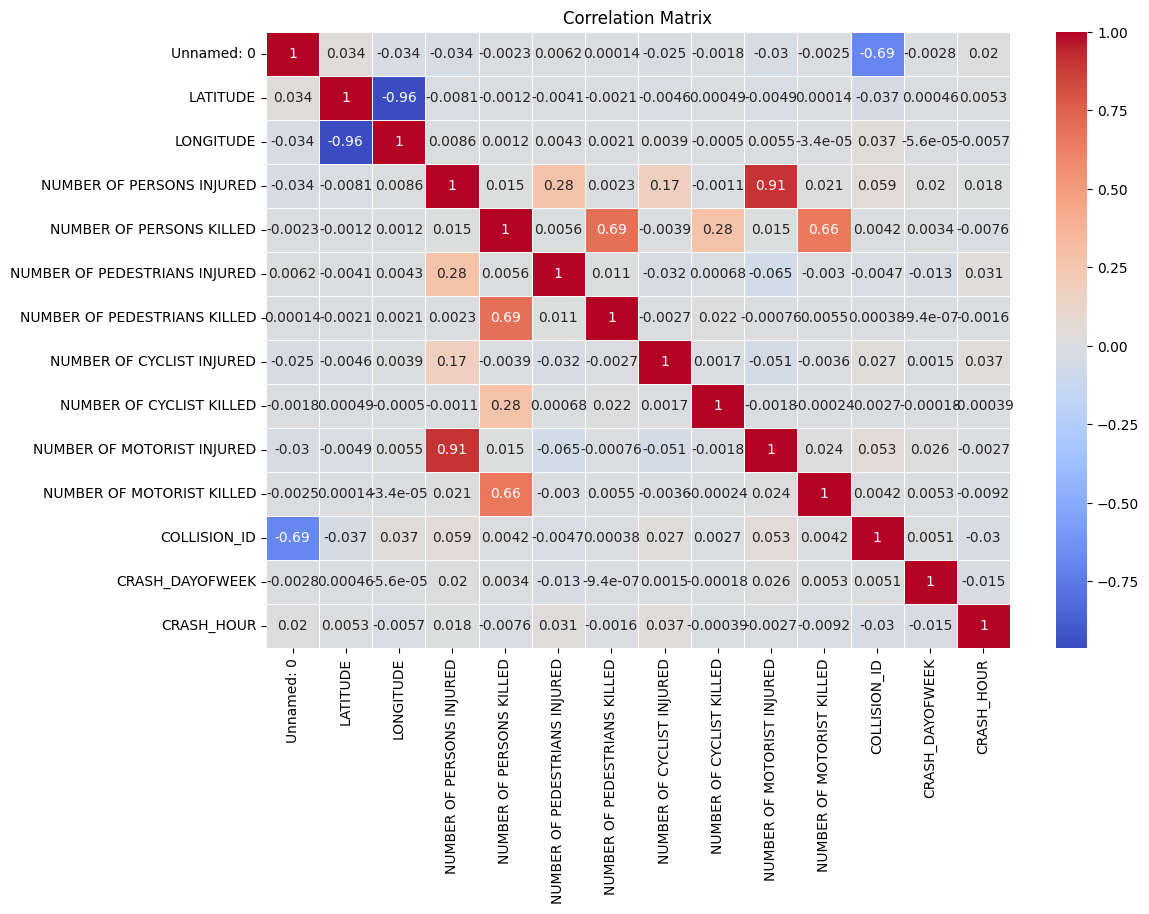

In [ ]:
#Look at correlations between columns
correlation_matrix = raw_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Plotting our latitude and longitude columns (giving us the location of each accident) in a scatterplot allowed us to see a few outliers (likely items where latitude, longitude, or both were entered incorrectly or not at all) that we may want to remove from the dataset before building our model.

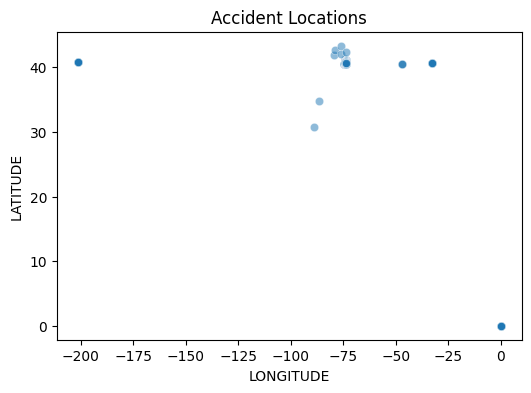

In [106]:
# Scatter plot for Latitude and Longitude
plt.figure(figsize=(6, 4))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=raw_data, alpha=0.5)
plt.title('Accident Locations')
plt.show()

As you can see above, there are outliers in the latitude and longitude columns! Obviously, if we are only describing vehicle accidents in New York City, those with outlying longitude+longitude combinations should be removed, which brings us to our next step...

## a) Data Cleaning
Here, we will drop rows that are NaN, outliers, and convert datatypes for certain features/columns


By dropping all rows with no given borough, it allows us to ensure that all data points in the set include this column. This is important, as predicting the borough with the highest number of crashes or greatest severity of crashes is one of the potential areas we want to focus on with our model. While merely predicting a borough (a wide spread of city with many different neighborhoods and locations withint each) may seem too broad a focus, we hope to start with a wider viewpoint and narrow our predictions as we work with our model.

In [ ]:
# Drop NA: Drop NaN 'BOROUGH' rows
rawData_cleaned = raw_data.dropna(subset='BOROUGH', axis=0)
len(rawData_cleaned)

1393382

First, let's address the problem we discovered at the end of our EDA - we have some instances whose Longitude and Latitude values don't make sense.

In [ ]:
# Filter out longitude values not between -65 and -75
rawData_cleaned = rawData_cleaned[(rawData_cleaned['LONGITUDE'] <= -65) & (rawData_cleaned['LONGITUDE'] >= -75)]
# Filter out latitude values not between 35 and 45
rawData_cleaned = rawData_cleaned[(rawData_cleaned['LATITUDE'] <= 45) & (rawData_cleaned['LATITUDE'] >= 35)]

Now we'll look at the scatterplot of longitude vs latitude again to verify that we successfully removed the geographic outliers

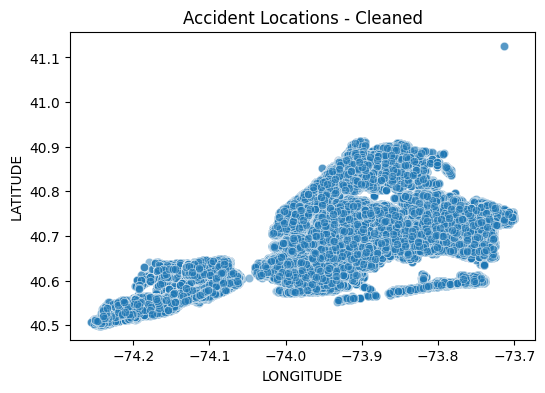

In [ ]:
# Make sure we got rid of 'em - success!
plt.figure(figsize=(6, 4))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=rawData_cleaned, alpha=0.5)
plt.title('Accident Locations - Cleaned')
plt.show()

Here we take the objects in the columns with date and time and convert them into DateTime objects instead. This will give us greater versatility in our predictions and make it much simplier to compare dates and times.

In [ ]:
### Converting data types
# Date of crash and time should be datetime, also aggregating the date and time columns to one datetime col
rawData_cleaned['CRASH DATE TIME'] = pd.to_datetime(rawData_cleaned['CRASH DATE']+' '+rawData_cleaned['CRASH TIME'])
rawData_cleaned.drop(['CRASH DATE', 'CRASH TIME'], axis=1, inplace=True)

Because another focus area in our model will be predicting time, date, and location of crashes, we need to ensure that all of our data points (rows) contain this information. As a result, here we drop all rows with NaN values in these columns. We still have over 1,300,000 rows in our data to work with when training and testing our model.

In [ ]:
# Drop NaN longitude/latitude/date columns
rawData_cleaned = rawData_cleaned.dropna(subset=['LATITUDE', 'LONGITUDE', "CRASH DATE TIME"], axis=0)
print('There are now {} instances in the data'.format(len(rawData_cleaned)))

There are now 1353836 instances in the data


Some vehicle types in the data were incomplete, improperly formatted, or otherwise difficule to work with . Here we cast all vehicle types to strings in order to begin proper formatting for all vehicles.

In [ ]:
# Convert Vehicle type columns to String
rawData_cleaned[['VEHICLE TYPE CODE 1',
                'VEHICLE TYPE CODE 2',
                'VEHICLE TYPE CODE 3',
                'VEHICLE TYPE CODE 4',
                'VEHICLE TYPE CODE 5']] = rawData_cleaned[['VEHICLE TYPE CODE 1',
                'VEHICLE TYPE CODE 2',
                'VEHICLE TYPE CODE 3',
                'VEHICLE TYPE CODE 4',
                'VEHICLE TYPE CODE 5']].astype(str)

Next we strip all vehicle type strings of leading and trailing whitespace.

In [ ]:
# Strip the string columns
rawData_cleaned['VEHICLE TYPE CODE 1'] = rawData_cleaned['VEHICLE TYPE CODE 1'].apply(lambda x: x.strip())
rawData_cleaned['VEHICLE TYPE CODE 2'] = rawData_cleaned['VEHICLE TYPE CODE 2'].apply(lambda x: x.strip())
rawData_cleaned['VEHICLE TYPE CODE 3'] = rawData_cleaned['VEHICLE TYPE CODE 3'].apply(lambda x: x.strip())
rawData_cleaned['VEHICLE TYPE CODE 4'] = rawData_cleaned['VEHICLE TYPE CODE 4'].apply(lambda x: x.strip())
rawData_cleaned['VEHICLE TYPE CODE 5'] = rawData_cleaned['VEHICLE TYPE CODE 5'].apply(lambda x: x.strip())

And finally take various versions of each vehicle type and ensure they are all in a similarly-formatted set of acceptable vehicle types. Rather than having to possibly consider versions of words with lowercase and captial letter separately, for example, we will now be able to simply find all vehicles of the same type if needed.

In [ ]:
### Change malformed values in Vehicle type columns to match better represented values
# Change Vehicle type value 'SPORT UTILITY / STATION WAGON' to 'Station Wagon/Sport Utility Vehicle' for consistency
rawData_cleaned.replace('SPORT UTILITY / STATION WAGON','Station Wagon/Sport Utility Vehicle', inplace=True)
# Group together '4 dr sedan' with 'Sedan'
rawData_cleaned.replace(['4 dr sedan','2 dr sedan'],'Sedan', inplace=True)
# Group together 'Bike' with 'Bicycle'
rawData_cleaned.replace(['Bike','BICYCLE'],'Bicycle', inplace=True)
# Group together 'BUS' and 'Bus'
rawData_cleaned.replace(['BUS','bus','MTA Bus'],'Bus', inplace=True)
# Pick-up Truck
rawData_cleaned.replace('PICK-UP TRUCK','Pick-up Truck', inplace=True)
# Taxi
rawData_cleaned.replace('TAXI','Taxi', inplace=True)
# Motorcycle
rawData_cleaned.replace(['MOTORCYCLE','motorcycle'],'Motorcycle', inplace=True)
# Firetruck
rawData_cleaned.replace(['FIRE TRUCK', 'FIRETRUCK', 'firetruck', 'FireTruck'], 'Firetruck', inplace=True)
# Ambulance
rawData_cleaned.replace(['AMBULANCE', 'AMBUL', 'ambul', 'Ambul', 'Ambu', 'ambulance', 'FDNY AMBUL', 'ambu'], 'Ambulance', inplace=True)
# Van
rawData_cleaned.replace(['VAN', 'Refrigerated Van', 'van'], 'Van', inplace=True)

After making sure all rows with vehicle types that are able to be converted into our selected format have been converted, we can go through that column and remove any rows with nonsense values or other incorrect information that does not match our expected vehicle types.

In [ ]:
### Remove rows witn nonsensical values in categorical comumn(s) - First, dump the unique values to a file so we can determine which ones we want to keep
# Street names
to_keep = ['Sedan', 'Station Wagon/Sport Utility Vehicle','PASSENGER VEHICLE','Taxi','Pick-up Truck','Taxi','Box Truck','Van','Bicycle','Bus',
           'LARGE COM VEH(6 OR MORE TIRES)', 'SMALL COM VEH(4 TIRES)','Tractor Truck','Convertible','Ambulance','Firetruck', 'nan']
rawData_cleaned = rawData_cleaned[rawData_cleaned[['VEHICLE TYPE CODE 1',
                                   'VEHICLE TYPE CODE 2',
                                   'VEHICLE TYPE CODE 3',
                                   'VEHICLE TYPE CODE 4',
                                   'VEHICLE TYPE CODE 5']].apply(lambda x: x.isin(to_keep)).all(axis=1)]

And finally, we are able to check that all remaining rows contain vehicle types that are correctly formatted according to our determined vehicle type schema.

In [ ]:
# Check that we successfully removed them - Success
all_vehicles = np.ravel(rawData_cleaned[['VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5']])
pd.Series(all_vehicles).value_counts().to_csv('allVehicles_type_CLEANED.csv')

We determined that we could drop the ID column, (called 'Unnamed: 0' in the dataset), as it has no real value to our model.

In [ ]:
# Drop the ID column
rawData_cleaned = rawData_cleaned.drop(['Unnamed: 0'], axis=1)

Additionally, we realized the location column contains a tuple of information that is also held in the latitude and longitude columns. As this tuple is redundant given the existing latitude and longitude columns (which will be simpler to use for comparison separately), it makes sense to drop the location column.

In [ ]:
# Drop the location column (just contains Lat and Lon in a tuple)
rawData_cleaned = rawData_cleaned.drop(['LOCATION'], axis=1)

After completing this cleaning and organizing, we determined it would be helpful to sort the information by crash date and time and reset all indexes in order to tidy up the dataframe.

In [ ]:
# Sort by ascending time and reset the index
rawData_cleaned.sort_values(['CRASH DATE TIME'], ascending=True, inplace=True)
rawData_cleaned.reset_index(inplace=True, drop=True)

Next, we want to clean up the contributing factor vehicle columns, just like we did with the vehicle type columns. First, we cast these columns' data into strings.

In [ ]:
# Convert Contributing Factor columns to String
rawData_cleaned[['CONTRIBUTING FACTOR VEHICLE 1',
                'CONTRIBUTING FACTOR VEHICLE 2',
                'CONTRIBUTING FACTOR VEHICLE 3',
                'CONTRIBUTING FACTOR VEHICLE 4',
                'CONTRIBUTING FACTOR VEHICLE 5']] = rawData_cleaned[['CONTRIBUTING FACTOR VEHICLE 1',
                'CONTRIBUTING FACTOR VEHICLE 2',
                'CONTRIBUTING FACTOR VEHICLE 3',
                'CONTRIBUTING FACTOR VEHICLE 4',
                'CONTRIBUTING FACTOR VEHICLE 5']].astype(str)

Followed by stripping leading and trailing whitespace on all of those newly-cast columns.

In [ ]:
# Strip the string columns
rawData_cleaned['CONTRIBUTING FACTOR VEHICLE 1'] = rawData_cleaned['CONTRIBUTING FACTOR VEHICLE 1'].apply(lambda x: x.strip())
rawData_cleaned['CONTRIBUTING FACTOR VEHICLE 2'] = rawData_cleaned['CONTRIBUTING FACTOR VEHICLE 2'].apply(lambda x: x.strip())
rawData_cleaned['CONTRIBUTING FACTOR VEHICLE 3'] = rawData_cleaned['CONTRIBUTING FACTOR VEHICLE 3'].apply(lambda x: x.strip())
rawData_cleaned['CONTRIBUTING FACTOR VEHICLE 4'] = rawData_cleaned['CONTRIBUTING FACTOR VEHICLE 4'].apply(lambda x: x.strip())
rawData_cleaned['CONTRIBUTING FACTOR VEHICLE 5'] = rawData_cleaned['CONTRIBUTING FACTOR VEHICLE 5'].apply(lambda x: x.strip())

In these columns, there was only one error we wanted to correct - in some cases, "illness" was misspelled as "illnes". Once this was corrected, we decided to drop rows with "unspecified" contributing factors. Our dataset previously had over 1,300,000 rows, but removing rows with this clarification brings our dataset down to just over 200,000 rows. While this will make training and testing much faster, we may decide to add some (or all) of those removed rows back into our data later depending on things we notice as we build our model.

In [ ]:
## Fix malformed contributing factors (1-5)
# Illness misspelled as 'Illnes'
rawData_cleaned.replace('Illnes', 'Illness', inplace=True)
# Drop rows with nonsensical contributing factors ('1' and '80'), as well as 'Unspecified'
# ----------> Dropping rows with 'unspecified' factors removes a large chunk of our dataset!
# ----------> We are left with 223,354 rows after this operation
to_keep = ['1','80', 'Unspecified']
mask = ~rawData_cleaned[['CONTRIBUTING FACTOR VEHICLE 1',
                                   'CONTRIBUTING FACTOR VEHICLE 2',
                                   'CONTRIBUTING FACTOR VEHICLE 3',
                                   'CONTRIBUTING FACTOR VEHICLE 4',
                                   'CONTRIBUTING FACTOR VEHICLE 5']].isin(to_keep).any(axis=1)
rawData_cleaned = rawData_cleaned[mask]

Once again, we check to ensure that our formatting and cleaning has happened correctly.

In [ ]:
# Check that we successfully removed them - Success
# Distribution of contributing factors to the crash for all vehicles involved
all_factors = np.ravel(rawData_cleaned[['CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5']])
pd.Series(all_factors).value_counts().to_csv('allContributingFactors_CLEANED.csv')

And finally, we sort and reset the dataframe to make sure everything is once again tidy and ready for our next steps. A quick check of the dataframe shows that things do look as we expect them to, as well as confirming the number of rows we have remaining in the data currently.

In [ ]:
# Finally, sort by date and reset the index
rawData_cleaned.sort_values(by='CRASH DATE TIME', ascending=True, inplace=True)
rawData_cleaned.reset_index(drop=True, inplace=True)
rawData_cleaned

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CRASH_DAYOFWEEK,CRASH_HOUR,CRASH DATE TIME
0,MANHATTAN,10036,40.762127,-73.997387,11 AVENUE,WEST 44 STREET,NaN,0.0,0.0,0,...,nan,37632,PASSENGER VEHICLE,Bus,nan,nan,nan,6,0,2012-07-01 00:05:00
1,BRONX,10451,40.824188,-73.913840,EAST 161 STREET,MELROSE AVENUE,NaN,0.0,0.0,0,...,nan,78654,PASSENGER VEHICLE,PASSENGER VEHICLE,nan,nan,nan,6,0,2012-07-01 00:22:00
2,BROOKLYN,11217,40.681852,-73.980036,4 AVENUE,ST MARKS PLACE,NaN,0.0,0.0,0,...,nan,175826,Station Wagon/Sport Utility Vehicle,PASSENGER VEHICLE,nan,nan,nan,6,1,2012-07-01 01:01:00
3,BROOKLYN,11223,40.608814,-73.972996,AVENUE P,MC DONALD AVENUE,NaN,2.0,0.0,2,...,nan,116266,PASSENGER VEHICLE,nan,nan,nan,nan,6,2,2012-07-01 02:20:00
4,MANHATTAN,10065,40.764162,-73.968890,EAST 61 STREET,PARK AVENUE,NaN,1.0,0.0,0,...,nan,44909,Taxi,Bicycle,nan,nan,nan,6,2,2012-07-01 02:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222763,BRONX,10462.0,40.846657,-73.859440,BRONXDALE AVENUE,MORRIS PARK AVENUE,NaN,2.0,0.0,0,...,nan,4658566,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,nan,nan,nan,3,20,2023-08-31 20:31:00
222764,MANHATTAN,10022.0,40.756763,-73.967160,EAST 53 STREET,2 AVENUE,NaN,1.0,0.0,1,...,nan,4659235,Station Wagon/Sport Utility Vehicle,nan,nan,nan,nan,3,21,2023-08-31 21:04:00
222765,MANHATTAN,10029.0,40.794860,-73.946490,PARK AVENUE,EAST 109 STREET,NaN,1.0,0.0,0,...,nan,4658604,Sedan,Station Wagon/Sport Utility Vehicle,nan,nan,nan,3,22,2023-08-31 22:14:00
222766,MANHATTAN,10039.0,40.828030,-73.934845,WEST 155 STREET,MACOMBS PLACE,NaN,1.0,0.0,0,...,nan,4658689,Station Wagon/Sport Utility Vehicle,nan,nan,nan,nan,3,23,2023-08-31 23:05:00


In [ ]:
# Filling in 0s for 'NUMBER OF PERSONS INJURED' and 'NUMBER OF PERSONS KILLED'
rawData_cleaned['NUMBER OF PERSONS INJURED'] = rawData_cleaned['NUMBER OF PERSONS INJURED'].fillna(0)
rawData_cleaned['NUMBER OF PERSONS KILLED'] = rawData_cleaned['NUMBER OF PERSONS KILLED'].fillna(0)

## b) Feature Engineering: Integrating traffic volume data into our dataset
Here, we will integrate traffic information into our training set

We were able to find a dataset with traffic volumes in New York City that we hope to intergrate into our existing dataset in order to consider the volume of vehicles on the road as we build our model.

In [ ]:
# Traffic Volume Counts
traffic_df = pd.read_csv('/content/drive/MyDrive/data/Traffic_Volume_Counts_20231128.csv')

Here we created a function that will allow us to adapt the abbreviated street suffix from different addresses in the traffic volume dataset and change them to their full word versions. This is important for street name matching because our accident dataset includes street names with unabbreviated street suffixes.

In [ ]:
def updateStreet(name):
  update = {'ST':'STREET', 'AVE':'AVENUE', 'RD':'ROAD', 'PL':'PLACE'}
  name = name.split(" ")
  final_street = ''
  for word in name:
    if word in update:
      final_street += update[word] + " "
    else:
      final_street += word + " "
  return final_street[:-1]

It was necessary to do a variety of pre-processing on the traffic volume dataset before merging it with our accident data to ensure the merge would work cleanly and correctly. We needed to check and adapt things like renaming the columns with times to contain the hour of accidents, the cases on street names (needed to be all uppercase), removing abbreviations with the custom function defined above, cleaning up leading/trailing whitespace, and changing the datatype

In [ ]:
# PRE-PROCESSING BEFORE JOINING DATASETS

# Renamed columns to the hour in which the crash occured
traffic_df = traffic_df.rename(columns={'12:00-1:00 AM':'0', '1:00-2:00AM':'1', '2:00-3:00AM':'2', '3:00-4:00AM':'3',
                                '4:00-5:00AM':'4', '5:00-6:00AM':'5', '6:00-7:00AM':'6', '7:00-8:00AM':'7',
                                '8:00-9:00AM':'8', '9:00-10:00AM':'9', '10:00-11:00AM':'10', '11:00-12:00PM':'11',
                                '12:00-1:00PM':'12', '1:00-2:00PM':'13', '2:00-3:00PM':'14', '3:00-4:00PM':'15',
                                '4:00-5:00PM':'16', '5:00-6:00PM':'17', '6:00-7:00PM':'18', '7:00-8:00PM':'19',
                                '8:00-9:00PM':'20', '9:00-10:00PM':'21', '10:00-11:00PM':'22', '11:00-12:00AM':'23',
                                'Roadway Name': 'Roadway_Name'})

# All street names should be upper case
traffic_df['Roadway_Name'] = traffic_df['Roadway_Name'].apply(lambda x: x.upper())

# Getting rid of abbreviations (AVE -> AVENUE, ST -> STREET)
traffic_df['Roadway_Name'] = traffic_df['Roadway_Name'].apply(lambda x: updateStreet(x))

# Cleaning up spaces after street name and making all street names upper case
rawData_cleaned['ON STREET NAME'] = rawData_cleaned['ON STREET NAME'].apply(lambda x: (x.strip()).upper() if not pd.isnull(x) else 'NA')

# make Traffic counts float type and remove commas (1,300 -> 1300) and fill in 0 if no traffic data available
for i in range(0, 24):
  traffic_df[str(i)] = traffic_df[str(i)].apply(lambda x: float(str(x).replace(",", "")) if not x == 'nan' else 0)

To work with the data and ensure all of our data has like types, we need to change the datatype of the Date column into the DateTime type. In the second block, we are able to pull out a column specifically with the hour of each crash (which is possible due to the DateTime format).

In [ ]:
# Converting column into datetime objects
rawData_cleaned['Date'] = rawData_cleaned['CRASH DATE TIME'].apply(lambda x: x.date().strftime("%m/%d/%Y"))

In [ ]:
rawData_cleaned['CRASH_HOUR'] = rawData_cleaned['CRASH DATE TIME'].apply(lambda x: x.hour)

After completing our processing on the traffic data, we are finally ready to merge our dataframes, effectively incorporating traffic counts into the data record for each crash from the initial set. After this action, our original dataset has been updated to now include weather conditions and traffic at the time of each accident.

In [ ]:
for hour in range(0, 24):
  temp_df = traffic_df[['Roadway_Name', 'Date', str(hour)]]
  temp_df['CRASH_HOUR'] = hour
  if hour == 0:
    data_merged = pd.merge(rawData_cleaned, temp_df, left_on=['CRASH_HOUR', 'ON STREET NAME', 'Date'], right_on=['CRASH_HOUR', 'Roadway_Name', 'Date'], how='left')
  else:
    data_merged = pd.merge(data_merged, temp_df, left_on=['CRASH_HOUR', 'ON STREET NAME', 'Date'], right_on=['CRASH_HOUR', 'Roadway_Name', 'Date'], how='left')
  data_merged = data_merged.drop('Roadway_Name', axis=1)
  data_merged[str(hour)] = data_merged[str(hour)].fillna(0)

<ipython-input-49-a35b88786252>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['CRASH_HOUR'] = hour
<ipython-input-49-a35b88786252>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['CRASH_HOUR'] = hour
<ipython-input-49-a35b88786252>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

This function we defined takes the traffic count for each hour and combines them to create a total.

In [ ]:
def get_total_traffic(x):
  total = 0
  for i in range(0, 24):
    total += x[str(i)]
  return total

And this final block uses our defined function to get a total traffic count and add it to a new column in the dataframe.

In [ ]:
rawData_cleaned['Total_Traffic'] = data_merged.apply(lambda x: get_total_traffic(x), axis=1)

## c) Feature Engineering: Integrating Data on Proximity to Tourist Attractions

The final feature added to our dataset is the relative proximity of each accident to popular tourist attractions in New York City.

This function was defined to take a given tuple coordinate and break it into its parts as latitude and longitude. These individual values are necessary to compare our accidents and tourist attractions.

In [ ]:
def clean_long_lat(coord):
  coord = coord.replace("POINT (", "").replace(")", "")
  lat = float(coord.split()[0])
  lon = float(coord.split()[1])
  return lat, lon

In this section, we took our tourist attraction dataset, narrowed it down to the highest traffic attractions, and pre-processed by converting latitude and longitude using our function defined above. We also removed unneeded columns and rows containing duplicate information to ensure we only retained the information of most value to our model.

In [ ]:
tourist_df = pd.read_csv('/content/drive/MyDrive/data/Point_Of_Interest.csv')
# filter the dataset to only represent higher traffic tourist attractions
tourist_attractions = ['CENTRAL PARK', 'AMTRAK', 'BROOKLYN BRIDGE PED AND BIKE', 'MANHATTAN BRIDGE BIKE PATH', 'MANHATTAN BRIDGE PEDESTRIAN',
                       'WILLIAMSBURG BR BIKE AND PED', 'GRAND CENTRAL TERMINAL', 'EMPIRE STATE BUILDING', 'TIMES SQUARE PLAZA']
tourist_df = tourist_df[tourist_df['NAME'].isin(tourist_attractions)]
tourist_df = tourist_df[['the_geom', 'NAME']]
# convert latitude and longitude values to floats and clean up
tourist_df['longitude'] = tourist_df['the_geom'].apply(lambda x: clean_long_lat(x)[0])
tourist_df['latitude'] = tourist_df['the_geom'].apply(lambda x: clean_long_lat(x)[1])
# drop unneeded columns and duplicate rows
tourist_df = tourist_df.drop('the_geom', axis=1)
tourist_df = tourist_df.drop([152, 175])

This function allows us to calculate the distrance between two points on a sphere (in this case, the Earth), which will allow us to determine the distance between a recorded accident and a tourist attraction.

In [ ]:
from math import radians, sin, cos, sqrt, atan2
# function to calculate the distance between 2 points on a sphere
def haversine_dist(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = 6371 * c  # radius of the earth in km
    return distance

Here, we are able to calculate the distance of each accident from our identified tourist attractions using the defined function and incorporate the calculated distance into our dataframe.

In [ ]:
for attraction in tourist_attractions:
  print("Calculating distance for " + attraction)
  lon = float(tourist_df[tourist_df['NAME'] == attraction]['longitude'])
  lat = float(tourist_df[tourist_df['NAME'] == attraction]['latitude'])
  rawData_cleaned[attraction] = rawData_cleaned.apply(lambda x: haversine_dist(x['LATITUDE'], x['LONGITUDE'], lat, lon), axis=1)

Calculating distance for CENTRAL PARK
Calculating distance for AMTRAK
Calculating distance for BROOKLYN BRIDGE PED AND BIKE
Calculating distance for MANHATTAN BRIDGE BIKE PATH
Calculating distance for MANHATTAN BRIDGE PEDESTRIAN
Calculating distance for WILLIAMSBURG BR BIKE AND PED
Calculating distance for GRAND CENTRAL TERMINAL
Calculating distance for EMPIRE STATE BUILDING
Calculating distance for TIMES SQUARE PLAZA


## d) Feature Engineering: Integrating Weather data

Here will will incorporate weather data into our training set. \
The dataset we used came from [The OpenMeteo](https://open-meteo.com/en/docs) ,




In addition to considering the number of vehicles on the road at a given time and place, it makes sense to consider weather conditions as well. We found a historical weather dataset, import it, and do some initial checks on datatypes and number of null values in the set.

In [ ]:
### Import our historical weather dataset & quick eda
weather = pd.read_csv('/content/drive/MyDrive/data/LGA.tsv', sep='\t')
weather.dtypes
weather.isnull().sum()

station                   0
valid                     0
lon                       0
lat                       0
tmpf                      3
dwpf                      3
relh                     82
drct                   2039
sknt                     43
p01i                      1
alti                     17
mslp                  16818
vsby                      9
gust                  91903
skyc1                    10
skyc2                 48819
skyc3                 83838
skyc4                107630
skyl1                  7967
skyl2                 48819
skyl3                 83838
skyl4                107630
wxcodes               91666
ice_accretion_1hr    114431
ice_accretion_3hr    114431
ice_accretion_6hr    114431
peak_wind_gust       105130
peak_wind_drct       105130
peak_wind_time       105130
feel                     92
metar                     0
snowdepth            114302
dtype: int64

Here we pulled the weather codes in order to determine which codes represent conditions that might feasibly affect driving and potentially cause vehicle accidents.

In [ ]:
# Count 'wxcodes' (weather codes)
weather['wxcodes'].value_counts().to_csv('weatherCodes_rawData_cleaned.csv')

After checking the data, we determined the following codes were more relevant to our model and dropped all other columns from the dataset. This focuses our data and allows us to work with only the weather conditions that most concern drivers.

In [ ]:
# Drop columns that are completely null
# Also, The columns we will want to keep / are informative are:
#   valid - time instance was recorded
#   sknt - windspeed in knots
#   p01i - One hour precipitation
#   csby - visibility in miles
#   gust - wind gust in knots (?)
#   wxcodes - Weather code(s), space-separated. Will need to be mapped to semantic meaning
weather = weather[['sknt','p01i','vsby','gust','wxcodes','valid']]
weather

,sknt,p01i,vsby,gust,wxcodes,valid
0,8.0,0.00,10.0,NaN,NaN,2012-07-01 00:51
1,9.0,0.00,10.0,NaN,NaN,2012-07-01 01:51
2,6.0,0.00,10.0,NaN,NaN,2012-07-01 02:51
3,3.0,0.00,10.0,NaN,NaN,2012-07-01 03:51
4,0.0,0.00,10.0,NaN,NaN,2012-07-01 04:51
...,...,...,...,...,...,...
114426,11.0,0.00,10.0,19.0,NaN,2023-08-30 19:51
114427,18.0,0.00,10.0,24.0,NaN,2023-08-30 20:51
114428,17.0,0.00,10.0,21.0,NaN,2023-08-30 21:51
114429,13.0,0.00,10.0,NaN,NaN,2023-08-30 22:51


In order to incorporate this data, we transformed the dates in the data into DateTime types, matching the rest of our cleaned data from above.

In [ ]:
# Convert date column ('valid') to datetime64[ns] type
weather['valid'] = weather['valid'].astype('datetime64[ns]')
weather['valid']

0        2012-07-01 00:51:00
1        2012-07-01 01:51:00
2        2012-07-01 02:51:00
3        2012-07-01 03:51:00
4        2012-07-01 04:51:00
                 ...        
114426   2023-08-30 19:51:00
114427   2023-08-30 20:51:00
114428   2023-08-30 21:51:00
114429   2023-08-30 22:51:00
114430   2023-08-30 23:51:00
Name: valid, Length: 114431, dtype: datetime64[ns]

After making our dates into a DateTime format, we are able to use those dates to match each accident time with the closest instance in our weather data by date and time, keeping record of those closest matches.

In [ ]:
### Match the crash date & hour to the closest instance in the weather df
weather_idxs = np.array(weather.valid.searchsorted(rawData_cleaned['CRASH DATE TIME'], side='right'))
# Correct the indexes
for i in range(0, len(weather_idxs)):
  if weather_idxs[i] == len(weather):
    weather_idxs[i]=weather_idxs[i]-1

In the following two blocks, we take our recorded matches from the weather data, and use that list to identify the needed rows in the weather data. Those rows are then matched to the accident data and the two dataframes are combined. This should give us weather data for each accident in our original dataset.

In [ ]:
# Get the weather instances
weather = weather.iloc[weather_idxs,:].reset_index()
weather

,index,sknt,p01i,vsby,gust,wxcodes,valid
0,0,8.0,0.00,10.0,NaN,NaN,2012-07-01 00:51:00
1,0,8.0,0.00,10.0,NaN,NaN,2012-07-01 00:51:00
2,1,9.0,0.00,10.0,NaN,NaN,2012-07-01 01:51:00
3,2,6.0,0.00,10.0,NaN,NaN,2012-07-01 02:51:00
4,2,6.0,0.00,10.0,NaN,NaN,2012-07-01 02:51:00
...,...,...,...,...,...,...,...
222763,114430,15.0,0.00,10.0,21.0,NaN,2023-08-30 23:51:00
222764,114430,15.0,0.00,10.0,21.0,NaN,2023-08-30 23:51:00
222765,114430,15.0,0.00,10.0,21.0,NaN,2023-08-30 23:51:00
222766,114430,15.0,0.00,10.0,21.0,NaN,2023-08-30 23:51:00


In processing our weather data, we realized that some values were missing from the data. This could cause errors or biased results in our model. In the following 4 blocks, we explored our weather data to see how much information was missing and look at whether using the mean of a specific type of weather might be a suitable option for filling in missing data.

In [ ]:
weather.isna().sum()

index           0
sknt          126
p01i            0
vsby           10
gust       170525
wxcodes    189987
valid           0
dtype: int64

In [ ]:
weather.dtypes

index               int64
sknt              float64
p01i               object
vsby              float64
gust              float64
wxcodes            object
valid      datetime64[ns]
dtype: object

In [ ]:
weather['sknt']

0          8.0
1          8.0
2          9.0
3          6.0
4          6.0
          ... 
222763    15.0
222764    15.0
222765    15.0
222766    15.0
222767    15.0
Name: sknt, Length: 222768, dtype: float64

In [ ]:
weather['sknt'].mean()

9.748294122402783

After exploring the possibility, it seemed possible to use the mean of a weather condition to add in missing values, and that was done for the columns where it was needed.

In [ ]:
# Trying to impute missing values in gust, sknt, and vsby
#from sklearn.impute import KNNImputer
#imputer = KNNImputer(n_neighbors=1)
#temp = weather[['sknt', 'vsby', 'gust']]
#imputer.fit_transform(temp)
weather['sknt'].fillna(weather['sknt'].mean(), inplace = True)
weather['vsby'].fillna(weather['vsby'].mean(), inplace = True)
weather['gust'].fillna(weather['gust'].mean(), inplace = True)

Finally, the cleaned and adapted weather data columns were added into our accident dataset.

In [ ]:
# Append weather data columns to our dataset
rawData_cleaned_feats = pd.concat([rawData_cleaned, weather], axis=1)
rawData_cleaned_feats.drop(['valid'],inplace=True,axis=1)
rawData_cleaned_feats

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,WILLIAMSBURG BR BIKE AND PED,GRAND CENTRAL TERMINAL,EMPIRE STATE BUILDING,TIMES SQUARE PLAZA,index,sknt,p01i,vsby,gust,wxcodes
0,MANHATTAN,10036,40.762127,-73.997387,11 AVENUE,WEST 44 STREET,NaN,0.0,0.0,0,...,5.581489,2.004645,1.830939,0.897850,0,8.0,0.00,10.0,22.762131,NaN
1,BRONX,10451,40.824188,-73.913840,EAST 161 STREET,MELROSE AVENUE,NaN,0.0,0.0,0,...,13.250404,9.595271,10.352926,9.860710,0,8.0,0.00,10.0,22.762131,NaN
2,BROOKLYN,11217,40.681852,-73.980036,4 AVENUE,ST MARKS PLACE,NaN,0.0,0.0,0,...,3.665605,7.858511,7.416481,8.348826,1,9.0,0.00,10.0,22.762131,NaN
3,BROOKLYN,11223,40.608814,-73.972996,AVENUE P,MC DONALD AVENUE,NaN,2.0,0.0,2,...,11.772230,15.980499,15.559238,16.490726,2,6.0,0.00,10.0,22.762131,NaN
4,MANHATTAN,10065,40.764162,-73.968890,EAST 61 STREET,PARK AVENUE,NaN,1.0,0.0,0,...,5.535016,1.476926,2.230711,1.940208,2,6.0,0.00,10.0,22.762131,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222763,BRONX,10462.0,40.846657,-73.859440,BRONXDALE AVENUE,MORRIS PARK AVENUE,NaN,2.0,0.0,0,...,17.648090,14.422225,15.217866,14.846571,114430,15.0,0.00,10.0,21.000000,NaN
222764,MANHATTAN,10022.0,40.756763,-73.967160,EAST 53 STREET,2 AVENUE,NaN,1.0,0.0,1,...,4.737999,0.974850,1.788659,1.893428,114430,15.0,0.00,10.0,21.000000,NaN
222765,MANHATTAN,10029.0,40.794860,-73.946490,PARK AVENUE,EAST 109 STREET,NaN,1.0,0.0,0,...,9.253656,5.376795,6.111346,5.596249,114430,15.0,0.00,10.0,21.000000,NaN
222766,MANHATTAN,10039.0,40.828030,-73.934845,WEST 155 STREET,MACOMBS PLACE,NaN,1.0,0.0,0,...,13.069816,9.127031,9.818510,9.186748,114430,15.0,0.00,10.0,21.000000,NaN


After incorporating our weather data, it is helpful to ensure those codes are readable and interpretable to us as we consider the data. Rather than using the weather codes (which may be common to meteorologists, but are less familiar to others), in the following blocks, we converted the codes to strings. After this, we were able to use the strings and information to convert the data into meaningful forms for our model (i.e. encoding each weather feature with a boolean value showing whether it was present at the time of each accident).

In [ ]:
# Change the 'wxcodes' column to String type
rawData_cleaned_feats['wxcodes'] = rawData_cleaned_feats['wxcodes'].astype(str)

In [ ]:
### Replace the 'wxcodes' with features that have more inherent meaning
## The weather code tells you the current conditions - we will encode this string into multiple features that describe the current conditions (is_raining, is_snowing, etc.)
# First, let's create an 'is_clear' column - meaning that if there is no wxcode present (NaN), the conditions are clear / quiet enough to not warrent an observation, therefore we assume clear enough to not effect driving
rawData_cleaned_feats['is_clear'] = rawData_cleaned_feats['wxcodes'].apply(lambda x: 1 if x=='nan' else 0)
# Next we will check if it is lightly raining (wxcode has RA, DZ, RA=rain, DZ=drizzle '-'=light) / light rain + thunderstorm (-TSRA)
rawData_cleaned_feats['is_light_rain'] = rawData_cleaned_feats['wxcodes'].apply(lambda x: 1 if '-RA' in x or '-DZ' in x or 'DZ' in x or x=='-TSRA' else 0)
# Now check for regular rain (RA)
rawData_cleaned_feats['is_rain'] = rawData_cleaned_feats['wxcodes'].apply(lambda x: 1 if 'RA' in x and '-' not in x else 0)
# Check for heavy rain (+RA, '+'=heavy)
rawData_cleaned_feats['is_heavy_rain'] = rawData_cleaned_feats['wxcodes'].apply(lambda x: 1 if '+RA' in x else 0)
# Check for thunderstorms (TS), this will also include thunderstorms+rain (TSRA)/heavy thunderstorms with rain (+TSRA)
rawData_cleaned_feats['is_thunder_rain'] = rawData_cleaned_feats['wxcodes'].apply(lambda x: 1 if '+TSRA' in x or 'TSRA' in x else 0)
# Check for light snow (-SN)
rawData_cleaned_feats['is_light_snow'] = rawData_cleaned_feats['wxcodes'].apply(lambda x: 1 if '-SN' in x or ('SN' in x and '-' in x) else 0)
# Check for regular/heavy snow (SN)
rawData_cleaned_feats['is_snow'] = rawData_cleaned_feats['wxcodes'].apply(lambda x: 1 if 'SN' in x or ('SN' in x and '+' in x) else 0)
# Check for fog / mist (FG / BR)
rawData_cleaned_feats['is_fog'] = rawData_cleaned_feats['wxcodes'].apply(lambda x: 1 if 'FG' in x or 'BR' in x else 0)
# Check for freezing conditiosn (FZ)
rawData_cleaned_feats['is_freezing'] = rawData_cleaned_feats['wxcodes'].apply(lambda x: 1 if 'FZ' in x else 0)
rawData_cleaned_feats

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,wxcodes,is_clear,is_light_rain,is_rain,is_heavy_rain,is_thunder_rain,is_light_snow,is_snow,is_fog,is_freezing
0,MANHATTAN,10036,40.762127,-73.997387,11 AVENUE,WEST 44 STREET,NaN,0.0,0.0,0,...,nan,1,0,0,0,0,0,0,0,0
1,BRONX,10451,40.824188,-73.913840,EAST 161 STREET,MELROSE AVENUE,NaN,0.0,0.0,0,...,nan,1,0,0,0,0,0,0,0,0
2,BROOKLYN,11217,40.681852,-73.980036,4 AVENUE,ST MARKS PLACE,NaN,0.0,0.0,0,...,nan,1,0,0,0,0,0,0,0,0
3,BROOKLYN,11223,40.608814,-73.972996,AVENUE P,MC DONALD AVENUE,NaN,2.0,0.0,2,...,nan,1,0,0,0,0,0,0,0,0
4,MANHATTAN,10065,40.764162,-73.968890,EAST 61 STREET,PARK AVENUE,NaN,1.0,0.0,0,...,nan,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222763,BRONX,10462.0,40.846657,-73.859440,BRONXDALE AVENUE,MORRIS PARK AVENUE,NaN,2.0,0.0,0,...,nan,1,0,0,0,0,0,0,0,0
222764,MANHATTAN,10022.0,40.756763,-73.967160,EAST 53 STREET,2 AVENUE,NaN,1.0,0.0,1,...,nan,1,0,0,0,0,0,0,0,0
222765,MANHATTAN,10029.0,40.794860,-73.946490,PARK AVENUE,EAST 109 STREET,NaN,1.0,0.0,0,...,nan,1,0,0,0,0,0,0,0,0
222766,MANHATTAN,10039.0,40.828030,-73.934845,WEST 155 STREET,MACOMBS PLACE,NaN,1.0,0.0,0,...,nan,1,0,0,0,0,0,0,0,0


## e) Preparation for Modelling
Here, we will prepare the dataset for modelling.
* Drop unneccessary columns / columns that would let our model 'cheat' (This will change with target variable)
* One-hot encode qualitative features - Vehicle type 1-5, Contributing factors 1-5

Our first target variable will be borough, a wide lens through which to attempt to predict with our model. We will make a specific dataframe with only the columns we need for this model and drop the columns that would give our model more information than it needs (like the borough classification, latitude/longitude, ZIP code, and street names). We will also drop other unnecessary columns before predicting.

In [ ]:
# Since we will be predicting Borough first, drop Borough, Lat/Lon, ZIP code, and street names
# Also, drop columns that aren't needed (index, wxcodes, crash date time (since we have hour - more generalizable))
model_prep_df = rawData_cleaned_feats

Here we one-hot encoded the vehicle types in our data in order to make that information useable for any model.

In [ ]:
# Generate onehot-encoded columns for vehicle type
vehicle_type_onehot = pd.get_dummies(rawData_cleaned_feats[['VEHICLE TYPE CODE 1',
                                             'VEHICLE TYPE CODE 2',
                                             'VEHICLE TYPE CODE 3',
                                             'VEHICLE TYPE CODE 4',
                                             'VEHICLE TYPE CODE 5']])
vehicle_type_onehot.drop(['VEHICLE TYPE CODE 1_nan',
                          'VEHICLE TYPE CODE 2_nan',
                          'VEHICLE TYPE CODE 3_nan',
                          'VEHICLE TYPE CODE 4_nan',
                          'VEHICLE TYPE CODE 5_nan'], inplace=True, axis=1)

Additionally, we one-hot encoded the contributing factors so they can be useable in our models as well.

In [ ]:
# Generate onehot-encoded columns for contributing factor
contributingFactor_onehot = pd.get_dummies(rawData_cleaned_feats[['CONTRIBUTING FACTOR VEHICLE 1',
                                             'CONTRIBUTING FACTOR VEHICLE 2',
                                             'CONTRIBUTING FACTOR VEHICLE 3',
                                             'CONTRIBUTING FACTOR VEHICLE 4',
                                             'CONTRIBUTING FACTOR VEHICLE 5']])
contributingFactor_onehot.drop(['CONTRIBUTING FACTOR VEHICLE 1_nan',
                                'CONTRIBUTING FACTOR VEHICLE 2_nan',
                                'CONTRIBUTING FACTOR VEHICLE 3_nan',
                                'CONTRIBUTING FACTOR VEHICLE 4_nan',
                                'CONTRIBUTING FACTOR VEHICLE 5_nan'], inplace=True, axis=1)

Now that our vehicle types and contributing factors have been one-hot encoded, we can add all of these new columns to our existing prepped dataframe for our models and print the dataframe to ensure things look as expected before we begin modelling.

In [ ]:
model_prep_df = pd.concat([model_prep_df, vehicle_type_onehot], axis=1)
model_prep_df = pd.concat([model_prep_df, contributingFactor_onehot], axis=1)
model_prep_df

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,CONTRIBUTING FACTOR VEHICLE 5_Fell Asleep,CONTRIBUTING FACTOR VEHICLE 5_Following Too Closely,CONTRIBUTING FACTOR VEHICLE 5_Illness,CONTRIBUTING FACTOR VEHICLE 5_Obstruction/Debris,CONTRIBUTING FACTOR VEHICLE 5_Other Vehicular,CONTRIBUTING FACTOR VEHICLE 5_Passing Too Closely,CONTRIBUTING FACTOR VEHICLE 5_Pavement Slippery,CONTRIBUTING FACTOR VEHICLE 5_Reaction to Uninvolved Vehicle,CONTRIBUTING FACTOR VEHICLE 5_Steering Failure,CONTRIBUTING FACTOR VEHICLE 5_Traffic Control Disregarded
0,MANHATTAN,10036,40.762127,-73.997387,11 AVENUE,WEST 44 STREET,NaN,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,BRONX,10451,40.824188,-73.913840,EAST 161 STREET,MELROSE AVENUE,NaN,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,BROOKLYN,11217,40.681852,-73.980036,4 AVENUE,ST MARKS PLACE,NaN,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,BROOKLYN,11223,40.608814,-73.972996,AVENUE P,MC DONALD AVENUE,NaN,2.0,0.0,2,...,0,0,0,0,0,0,0,0,0,0
4,MANHATTAN,10065,40.764162,-73.968890,EAST 61 STREET,PARK AVENUE,NaN,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222763,BRONX,10462.0,40.846657,-73.859440,BRONXDALE AVENUE,MORRIS PARK AVENUE,NaN,2.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
222764,MANHATTAN,10022.0,40.756763,-73.967160,EAST 53 STREET,2 AVENUE,NaN,1.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
222765,MANHATTAN,10029.0,40.794860,-73.946490,PARK AVENUE,EAST 109 STREET,NaN,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
222766,MANHATTAN,10039.0,40.828030,-73.934845,WEST 155 STREET,MACOMBS PLACE,NaN,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


From our prepared data, we are ready to create specific dataframes for our models looking at specific target variables. First, we will drop unnecessary and leading columns for our model predicting the borough.

In [ ]:
#model_prep_df = model_prep_df.select_dtypes(exclude=['object'])
# Make the final dataframe for predicting borough
predict_borough_df = model_prep_df.drop(['VEHICLE TYPE CODE 1',
                                    'VEHICLE TYPE CODE 2',
                                    'VEHICLE TYPE CODE 3',
                                    'VEHICLE TYPE CODE 4',
                                    'VEHICLE TYPE CODE 5',
                                    'CONTRIBUTING FACTOR VEHICLE 1',
                                    'CONTRIBUTING FACTOR VEHICLE 2',
                                    'CONTRIBUTING FACTOR VEHICLE 3',
                                    'CONTRIBUTING FACTOR VEHICLE 4',
                                    'CONTRIBUTING FACTOR VEHICLE 5',
                                    'Date',
                                    'p01i',
                                    'LATITUDE',
                                    'LONGITUDE',
                                    'ZIP CODE',
                                    'ON STREET NAME',
                                    'CROSS STREET NAME',
                                    'OFF STREET NAME',
                                    'index',
                                    'CRASH DATE TIME',
                                    'wxcodes'], axis=1)

Next, we will prepare a dataframe for the model predicting crash severity. We need to use the existing columns with number of individuals injured or killed to create a severity scale, as defined in the function below. We will use this function to create a rating system for the severity of each accident - specifically, we will denote a crash that did not involve an injury or fatality as a 0, and one that did have an injury or fatality as a 1. This effectively creates a column denoting whether special attention to this crash was required - i.e. the services of EMS or ambulances. After defining our function, we can apply it to each row in our dataset and add the results to a new column.

In [ ]:
### Make the final dataframe for predicting crash severity - we will need to add a target feature describing severity
# Let's use the number of people killed / injured as a measure of severity:
# 0 = No injuries or fatalitiees
# 1 = An injury or fatality occurred
def get_crash_severity_level(x):
  if x['NUMBER OF PERSONS KILLED'] == 0 and x['NUMBER OF PERSONS INJURED'] == 0:
    return 0
  return 1
predict_severity_df = model_prep_df
predict_severity_df['CRASH_SEVERITY'] = predict_severity_df.apply(get_crash_severity_level, axis=1)

After applying our function, we checked to see if the severity seemed to apply correctly, as well as to get an idea of whether the severity data is balanced or unbalanced. It appears to skew heavily toward accidents with less severity, so this data is not perfectly balanced. This is something to keep in mind as we build and evaluate our model.

In [ ]:
# Peek at the distribution of severities
predict_severity_df['CRASH_SEVERITY'].value_counts()

0    144378
1     78390
Name: CRASH_SEVERITY, dtype: int64

Now that we have a severity index added to our data, we can drop the unecessary and leading columns from our data to create a dataframe specifically for the model predicting severity.

In [ ]:
# Now, we drop columns that would not be necessary when predicting the severity level
predict_severity_df = predict_severity_df.drop(['VEHICLE TYPE CODE 1',
                                    'VEHICLE TYPE CODE 2',
                                    'VEHICLE TYPE CODE 3',
                                    'VEHICLE TYPE CODE 4',
                                    'VEHICLE TYPE CODE 5',
                                    'CONTRIBUTING FACTOR VEHICLE 1',
                                    'CONTRIBUTING FACTOR VEHICLE 2',
                                    'CONTRIBUTING FACTOR VEHICLE 3',
                                    'CONTRIBUTING FACTOR VEHICLE 4',
                                    'CONTRIBUTING FACTOR VEHICLE 5',
                                    'Date',
                                    'p01i',
                                    'LATITUDE',
                                    'LONGITUDE',
                                    'ZIP CODE',
                                    'ON STREET NAME',
                                    'CROSS STREET NAME',
                                    'OFF STREET NAME',
                                    'index',
                                    'CRASH DATE TIME',
                                    'wxcodes',
                                    'COLLISION_ID',
                                    'NUMBER OF PERSONS INJURED',
                                    'NUMBER OF PERSONS KILLED'], axis=1)
# We also want to drop the columns that encode how many people were hurt/killed, as our target value is a function of these values
predict_severity_df = predict_severity_df.drop(['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
                                                'NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED',
                                                'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED'], axis=1)

Additionally, because this model is not predicting the borough, we can now one-hot encode the borough column to make this data useable to our model. We also printed out a visualization of this dataframe to ensure things look as expected before we begin modelling.

In [ ]:
# One-hot encode the borough column, since we can now use that information in our model
borough_onehot = pd.get_dummies(predict_severity_df['BOROUGH'])
predict_severity_df = pd.concat([predict_severity_df, borough_onehot], axis=1)
predict_severity_df.drop(['BOROUGH'], axis=1, inplace=True)
predict_severity_df

,CRASH_DAYOFWEEK,CRASH_HOUR,Total_Traffic,CENTRAL PARK,AMTRAK,BROOKLYN BRIDGE PED AND BIKE,MANHATTAN BRIDGE BIKE PATH,MANHATTAN BRIDGE PEDESTRIAN,WILLIAMSBURG BR BIKE AND PED,GRAND CENTRAL TERMINAL,...,CONTRIBUTING FACTOR VEHICLE 5_Pavement Slippery,CONTRIBUTING FACTOR VEHICLE 5_Reaction to Uninvolved Vehicle,CONTRIBUTING FACTOR VEHICLE 5_Steering Failure,CONTRIBUTING FACTOR VEHICLE 5_Traffic Control Disregarded,CRASH_SEVERITY,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
0,6,0,0.0,3.520668,14.220183,6.021815,5.855008,5.857369,5.581489,2.004645,...,0,0,0,0,0,0,0,1,0,0
1,6,0,0.0,6.351329,6.069151,14.788007,14.327074,14.347076,13.250404,9.595271,...,0,0,0,0,0,1,0,0,0,0
2,6,1,0.0,11.246360,22.282376,3.327355,3.244268,3.249966,3.665605,7.858511,...,0,0,0,0,0,0,1,0,0,0
3,6,2,0.0,19.309492,30.194306,11.247978,11.322858,11.322667,11.772230,15.980499,...,0,0,0,0,1,0,1,0,0,0
4,6,2,0.0,2.047784,13.165489,6.749600,6.360438,6.375559,5.535016,1.476926,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222763,3,20,0.0,11.418133,6.586166,19.399487,18.873525,18.897583,17.648090,14.422225,...,0,0,0,0,1,1,0,0,0,0
222764,3,21,0.0,2.851863,13.921371,6.060062,5.633881,5.651090,4.737999,0.974850,...,0,0,0,0,1,0,0,1,0,0
222765,3,22,0.0,2.102492,9.406066,10.632933,10.213480,10.230827,9.253656,5.376795,...,0,0,0,0,1,0,0,1,0,0
222766,3,23,0.0,5.685301,5.607520,14.407813,14.008762,14.025100,13.069816,9.127031,...,0,0,0,0,1,0,0,1,0,0


Finally, we did a simple check of the datatypes in our dataframe to ensure there were no columns that still needed to be changed to a usable datatype for our models.

In [ ]:
for col, item in model_prep_df.dtypes.iteritems():
  if item == 'object':
    print(col, item)

BOROUGH object
ZIP CODE object
ON STREET NAME object
CROSS STREET NAME object
OFF STREET NAME object
CONTRIBUTING FACTOR VEHICLE 1 object
CONTRIBUTING FACTOR VEHICLE 2 object
CONTRIBUTING FACTOR VEHICLE 3 object
CONTRIBUTING FACTOR VEHICLE 4 object
CONTRIBUTING FACTOR VEHICLE 5 object
VEHICLE TYPE CODE 1 object
VEHICLE TYPE CODE 2 object
VEHICLE TYPE CODE 3 object
VEHICLE TYPE CODE 4 object
VEHICLE TYPE CODE 5 object
Date object
p01i object
wxcodes object


<ipython-input-79-c372a1f1906e>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, item in model_prep_df.dtypes.iteritems():


# II: Modelling





## 1. Predicting Location
  * **Borough**: Random Forest, Gradient Boosting, or Logistic Regression as it is a multiclass classification problem and can handle imbalanced classes


### a) Logistic Regression
With our data cleaned, we can start modelling! To start, we will use logistic regression to classify whether a certain borough is more likely to have an accident given a certain time, date, and xyz.

First, in building our Logistic Regression model, we set our target and features.

In [164]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
target = le.fit_transform(predict_borough_df['BOROUGH'])
features = predict_borough_df.drop('BOROUGH', axis=1)

And next, we create our train and test sets from our data.

In [165]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=seed, test_size=0.2)

Next, we fit the training data to our Logistic Regression model.

In [82]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Finally, we can get our predictions that will be needed to see the accuracy of our model.

In [83]:
y_pred = model.predict(X_test)

In checking the accuracy, we can see that this model's accuracy is very low - only about 31% accuracy. It is clear that we want to try some other ways of modeling to see if any are more accurate than Logistic Regression.

In [84]:
log_acc = model.score(X_test, y_test)
log_acc

0.31225030300309736

In [85]:
confusion_matrix(y_test,y_pred)

array([[    0,     0,  6526,     0,     0],
       [    0,     0, 11788,     0,     0],
       [    0,     0, 13912,     0,     0],
       [    0,     0, 10648,     0,     0],
       [    0,     0,  1680,     0,     0]])

### b) Logistic Regression with PCA

Our model with Logistic Regression alone was not very accuracy, so we will attempt to improve that by adding PCA.

Here, we need to import some other functions to attempt to improve the accuracy of our model. We will continue with a Logistic Regression model but with the addition of PCA.

In [166]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix

Here, we fit and transform the data to our new PCA model.

In [167]:
s = StandardScaler()
new_X_train = s.fit_transform(X_train)

pca = PCA()
pca.fit(new_X_train)

PCA()

We also want to look at the explained variance ratios in this new model, which we are doing here.

In [168]:
explained_variance_ratios = pca.explained_variance_ratio_
cum_evr = explained_variance_ratios.cumsum()

Here, we are visualizing the number of components against the explained variance ratio, with a marked threshold of 80%.

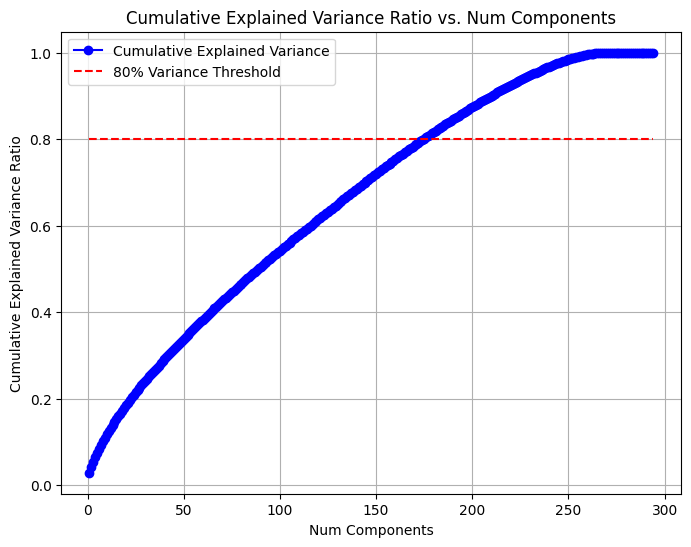

In [151]:
components_range = range(1, len(cum_evr) + 1)
var_thresh = 0.8
threshold_line = [var_thresh] * len(components_range)

plt.figure(figsize=(8, 6))
plt.plot(components_range, cum_evr, marker='o', linestyle='-', color='b', label='Cumulative Explained Variance')
plt.plot(components_range, threshold_line, linestyle='--', color='r', label='80% Variance Threshold')
plt.xlabel('Num Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Num Components')
plt.grid(True)
plt.legend()
plt.show()

Using that visualization, we can set our number of components (to 180), and fit and transform our data.

In [169]:
n = 180
pca = PCA(n_components=n)
pca.fit(new_X_train)

X_train_pca = pca.transform(new_X_train)
X_test_pca = pca.transform(s.transform(X_test))

Finally, we can perform our final fits, get predictions, and look at our accuracy. While it has increased from the original Logistic Regression model, the addition of PCA took it from 31% up to 87%.

In [170]:
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train)

y_pred = log_reg_pca.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_pred)
test_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8674193113974054

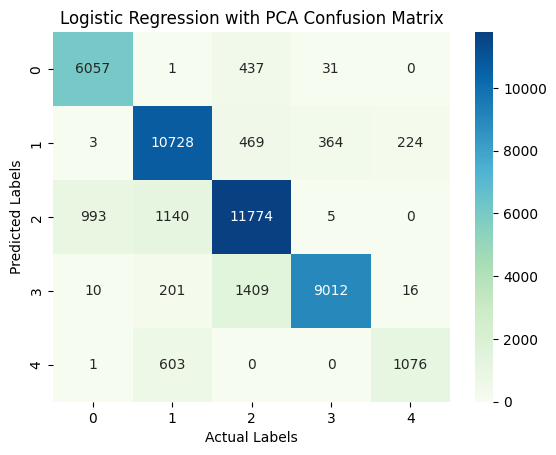

In [171]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='GnBu', fmt='g')
plt.title('Logistic Regression with PCA Confusion Matrix')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()

### c) Random Forest

Another option we can try to improve our model's accuracy is a Random Forest.

Here we perform the necessary imports for building our model with a Random Forest.

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

And next we are able to initialize the model and train it.

In [172]:
model = RandomForestClassifier(class_weight='balanced', n_estimators=120, max_depth=30, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=120,
                       random_state=42)

Next, we get our predictions.

In [173]:
y_pred = model.predict(X_test)

And finally we can check the accuracy of the model. In a great improvement from our first two models, we now have 99% accuracy! This is drastic change from building the model with Logistic Regression, but there are still other options we can try for comparison.

In [174]:
rf_acc = model.score(X_test, y_test)
rf_acc

0.9919872514252368

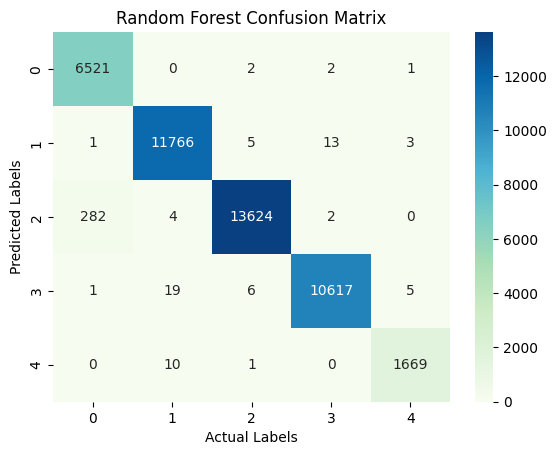

In [175]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='GnBu', fmt='g')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()

### d) K-Means Clustering

Now we'll make some more imports to try this model with K-Means Clustering.

In [104]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

This visualization allows us to find the elbow and determine our number of clusters for the model.

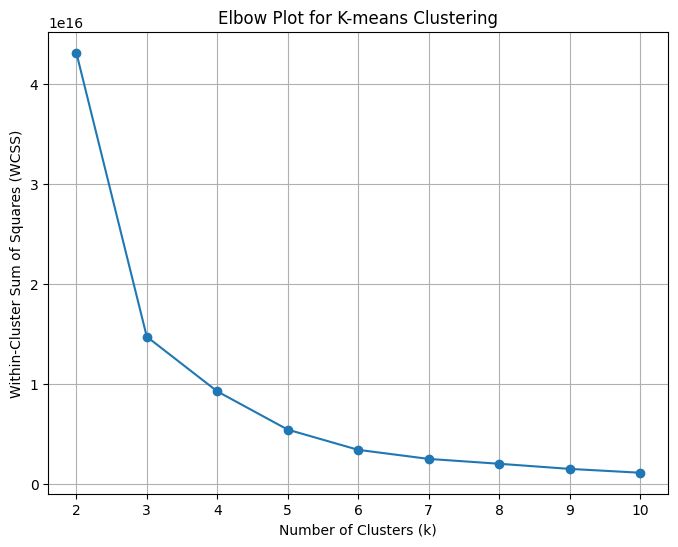

In [105]:
wcss = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, n_init=5, random_state=0)
  kmeans.fit(features, target)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='-')
plt.title("Elbow Plot for K-means Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid(True)
plt.show()

After looking at our visualization, we can set the number of clusters and fit our data with the target and features.

In [107]:
kmeans = KMeans(n_clusters=5, n_init=5, random_state=0)
kmeans.fit(features, target)

KMeans(n_clusters=5, n_init=5, random_state=0)

Finally, we get our predictions and centroids.

In [108]:
y_pred = kmeans.predict(X_test)
centroids = kmeans.cluster_centers_

In [109]:
confusion_matrix(y_test,y_pred)

array([[2117,  805, 1369,  130, 2105],
       [3455, 1691, 2965,  295, 3382],
       [2682, 2825, 4405,  509, 3491],
       [3066, 1567, 2618,  300, 3097],
       [ 421,  253,  522,   26,  458]])

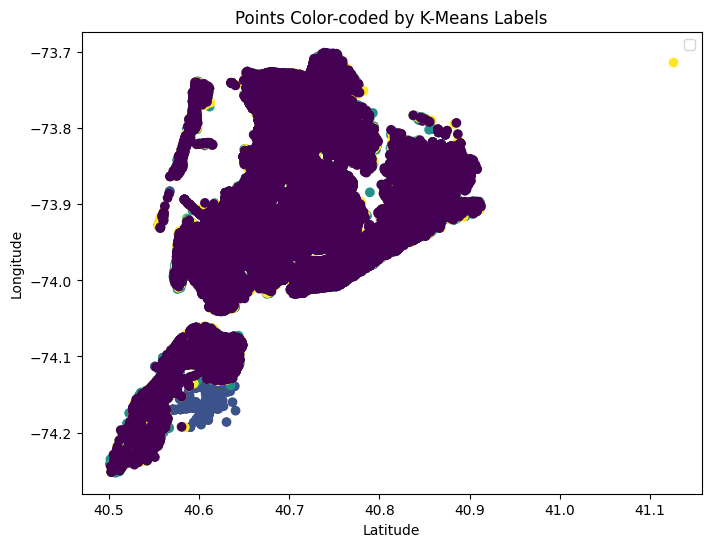

In [120]:
plt.figure(figsize=(8, 6))
plt.legend()
plt.title("Points Color-coded by K-Means Labels")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.scatter(model_prep_df['LATITUDE'], model_prep_df['LONGITUDE'], c=kmeans.labels_.astype(float))
plt.show()

### e) Gradient Boosting

Our final model for this target feature is using gradient boosting. We make the necessary imports for this below, as well as getting the needed imports to look at the accuracy.

In [176]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Here we create our model and fit the training sets.

In [177]:
model = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

Next, we make our predictions.

In [179]:
y_pred = model.predict(X_test)

And now we are able to look our predictions in a confusion matrix.

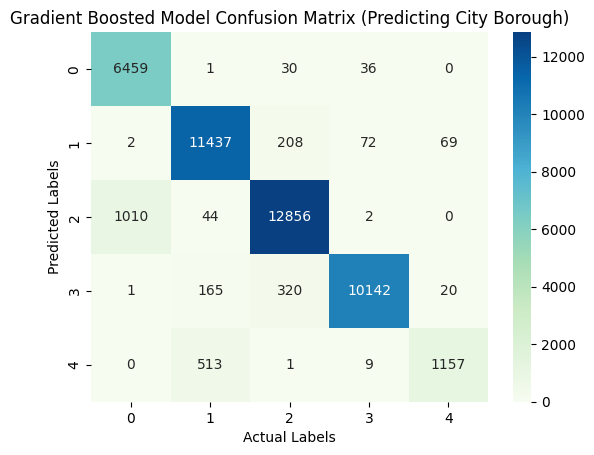

In [181]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='GnBu', fmt='g')
plt.title('Gradient Boosted Model Confusion Matrix (Predicting City Borough)')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()

When checking the accuracy of this model, we can see it has increased to a massive 94%! This is clearly a much more effective model than some of our other attempts to predict the borough of a crash.

In [182]:
accuracy_score(y_test, y_pred)

0.943820981281142

Looking at this classification report, we can see some important information, like the precision, recall, and F1 scores. With few exceptions, these scores primarily land above 90%, an encouraging trend across the model.

In [183]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6526
           1       0.94      0.97      0.96     11788
           2       0.96      0.92      0.94     13912
           3       0.99      0.95      0.97     10648
           4       0.93      0.69      0.79      1680

    accuracy                           0.94     44554
   macro avg       0.94      0.91      0.92     44554
weighted avg       0.95      0.94      0.94     44554



## 2. Predicting Severity of crash
Let's try some of the same methods as above to predict the severity of each accident, as we again have a multiclass classification problem with imbalanced classes. Again, we defined the severity of a crash as either a 0 (no injuries / fatalities, i.e. no medical attention was required) or a 1 (an injury / fatality occurred, i.e. medical attention was / may have been required)

First we need to initiaize our new training and test sets with the dataframe we prepared specifically for the models predicting this target variable.

In [126]:
# Initialize our training and testing sets
target = predict_severity_df['CRASH_SEVERITY']
features = predict_severity_df.drop(['CRASH_SEVERITY'],axis=1)
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=seed, test_size=0.2)

### a) Logistic Regression

Similarly to when we built our model predicting accident boroughs, we will start with a Logistic Regression model.

First we create the model and fit the data.

In [127]:
# Initialize and fit our model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Next we make our predictions and check the accuracy. The accuracy is much higher than the borough Logistic Regression model, at 72%! However, this is still not has high as we would hope for an effective model.

In [128]:
# Make predictions and calculate accuracy
y_pred = model.predict(X_test)
log_acc = model.score(X_test, y_test)
log_acc

0.7727027876284958

Additionally, when checking the confusion matrix for this model, we can see that it's missing significant numbers of its predictions. This is likely due to imbalance in the dataset.

In [129]:
# Show confusion matrix
confusion_matrix(y_test,y_pred)

array([[24548,  4250],
       [ 5877,  9879]])

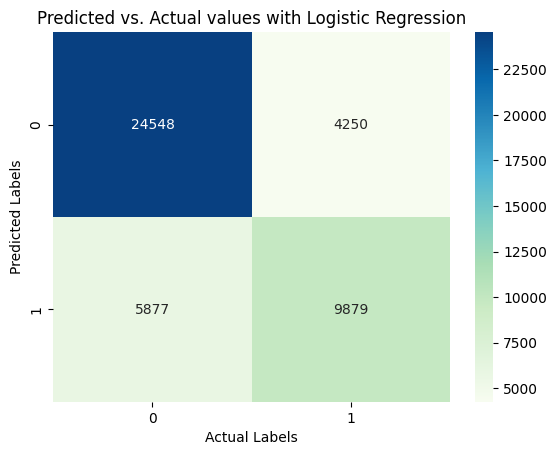

In [130]:
# Plot confusion matrix - the results are suboptimal - class '1' (a severe crash) is mislabeled more than hald the time in our test set!
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='GnBu', annot=True, fmt='g')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted vs. Actual values with Logistic Regression')
plt.show()

### b) Gradient Boosting

To attempt to improve the model, we will try Gradient Boosting.

Here we initialize the model and fit the data.

In [131]:
# Try gradient boosting - initialize and fit model
model = GradientBoostingClassifier(n_estimators=500,learning_rate=0.5,random_state=100,max_features=5)
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_features=5, n_estimators=500,
                           random_state=100)

Again, we make predictions and check the accuracy. While accuracy has improved to 81%, we still need to check the confusion matrix to see what numbers of misses we have.

In [132]:
# Make predictions and calculate accuracy
y_pred = model.predict(X_test)
gb_acc = model.score(X_test, y_test)
gb_acc

0.8124747497418863

The confusion matrix shows a significant improvement from the Logistic Regression model in number of missed predictions, but the numbers are still fairly high.

In [133]:
# Show confusion matrix
confusion_matrix(y_test,y_pred)

array([[25183,  3615],
       [ 4740, 11016]])

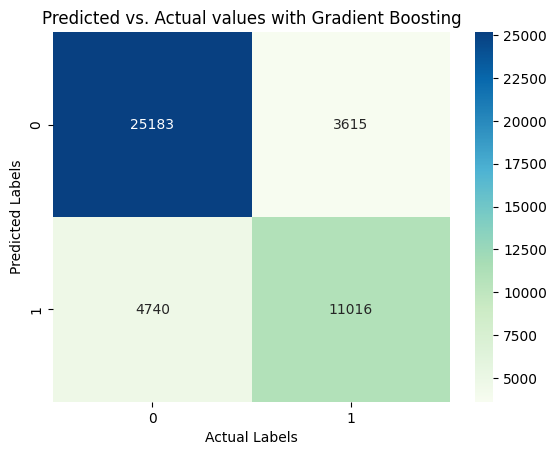

In [134]:
# Plot confusion matrix - the predictions made on our test set are better!
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='GnBu', annot=True, fmt='g')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted vs. Actual values with Gradient Boosting')
plt.show()

### c) Random Forest

A final model version to see how we might improve this model can be built as a Random Forest.

First we will build this model as a random forest. We initialize our model and fit the data.

In [135]:
# Initialize and train model
model = RandomForestClassifier(class_weight='balanced', n_estimators=120, max_depth=30, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=120,
                       random_state=42)

Next, we get our predictions and can check our accuracy. At 80%, it's very similar to our Gradient Boosting model.

In [136]:
# Make predictions and calculate accuracy
y_pred = model.predict(X_test)
rf_acc = model.score(X_test, y_test)
rf_acc

0.8025542038874175

And looking at the confusion matrix shows a very similar result to the previous model.

In [137]:
# Show confusion matrix
confusion_matrix(y_test,y_pred)

array([[24163,  4635],
       [ 4162, 11594]])

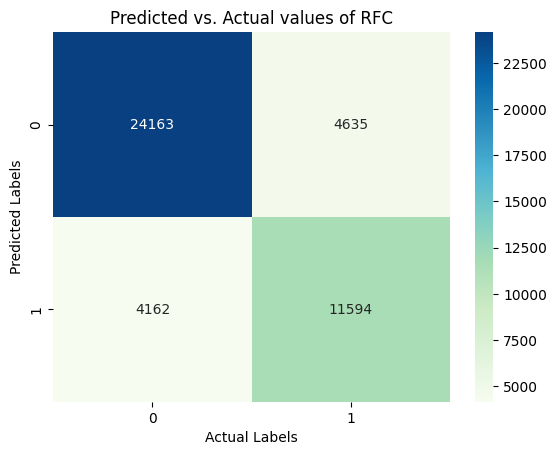

In [138]:
# Plot confusion matrix - the performance is only marginally better than our Gradient Boosting
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='GnBu', annot=True, fmt='g')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted vs. Actual values of RFC')
plt.show()

#### i. Undersampling
Our severity dataset is imbalanced at about a 2:1 ratio of 0s to 1s. To address this, we can **downsample** the majority class (0) to the number of instances of the minority class (1).

This significantly reduces the number of rows in the data, but we are interested to see if this change makes any significant difference in the learning of the model. We are looking to compare this version of the model to other existing versions.

In [142]:
# Can we do better?
# We will undersample all instances of each severity level class to 481 (size of minority class!) instances
indices = []
SIZE = 78390
for i in range(0,2):
  indices.append(np.random.choice(predict_severity_df[predict_severity_df['CRASH_SEVERITY'] == i].index,SIZE,replace=False))
indices = [item for sublist in indices for item in sublist]
predict_severity_undersampled = predict_severity_df.loc[indices]
predict_severity_undersampled.reset_index(inplace=True, drop=True)
predict_severity_undersampled

,CRASH_DAYOFWEEK,CRASH_HOUR,Total_Traffic,CENTRAL PARK,AMTRAK,BROOKLYN BRIDGE PED AND BIKE,MANHATTAN BRIDGE BIKE PATH,MANHATTAN BRIDGE PEDESTRIAN,WILLIAMSBURG BR BIKE AND PED,GRAND CENTRAL TERMINAL,...,CONTRIBUTING FACTOR VEHICLE 5_Pavement Slippery,CONTRIBUTING FACTOR VEHICLE 5_Reaction to Uninvolved Vehicle,CONTRIBUTING FACTOR VEHICLE 5_Steering Failure,CONTRIBUTING FACTOR VEHICLE 5_Traffic Control Disregarded,CRASH_SEVERITY,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
0,6,23,0.0,9.430225,20.555476,1.140191,1.091472,1.088841,2.087504,5.968224,...,0,0,0,0,0,0,1,0,0,0
1,0,8,0.0,7.655923,4.626849,16.226114,15.781258,15.800341,14.734671,10.993711,...,0,0,0,0,0,1,0,0,0,0
2,0,10,0.0,1.836549,12.857443,7.113687,6.696721,6.713563,5.793993,1.894741,...,0,0,0,0,0,0,0,1,0,0
3,4,13,0.0,14.567846,19.057556,16.608644,15.954014,15.988266,14.543007,14.674245,...,0,0,0,0,0,0,0,0,1,0
4,3,13,0.0,9.982157,21.061702,2.084678,1.915127,1.923310,2.420420,6.563080,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156775,3,23,0.0,3.108994,14.141529,5.892905,5.446367,5.464788,4.504431,1.013118,...,0,0,0,0,1,0,0,1,0,0
156776,1,11,0.0,13.570354,23.965403,7.438319,7.120928,7.140274,6.760276,10.629141,...,0,0,0,0,1,0,1,0,0,0
156777,4,9,0.0,11.258772,22.396132,2.526523,2.886067,2.868594,4.047252,7.785808,...,0,0,0,0,1,0,1,0,0,0
156778,2,15,0.0,15.626718,26.392598,8.112881,8.037210,8.044427,8.219840,12.396511,...,0,0,0,0,1,0,1,0,0,0


#### Random Forest - Undersampled

After undersampling the data, create new training and test data from the newly balanced dataframe, as well as setting target and features.

In [143]:
### Now, let's try a random forest on the new undersampled dataframe
# First, setup training and test sets with undersampled dataframe
target = predict_severity_undersampled['CRASH_SEVERITY']
features = predict_severity_undersampled.drop(['CRASH_SEVERITY'],axis=1)
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=seed, test_size=0.2)

Now we can initialize a new Random Forest and fit the data.

In [144]:
# Initialize and fit Random Forest
rfc = RandomForestClassifier(random_state=42, n_estimators = 200, max_depth = 20)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

Now we can get predictions and check the accuracy of this version of the model. We can see the accuracy increased to 87%, a stark change from our very first model's 80%.

In [145]:
# Make predictions and obtain accuracy
y_pred = model.predict(X_test)
rf_acc = model.score(X_test, y_test)
rf_acc

0.8664370455415231

Looking at the confusion matrix (both numerically and visually in the folowing block) also shows significant improvement. While this is one way to increase the accuracy of the model, we do have to consider how much smaller the dataset had to become in order to get these results. Knowing that the model learned from far fewer instances means the information gained has a much narrower scope than it did in the previous version of the model.

In [146]:
# View confusion matrix
confusion_matrix(y_test,y_pred)

array([[13228,  2263],
       [ 1925, 13940]])

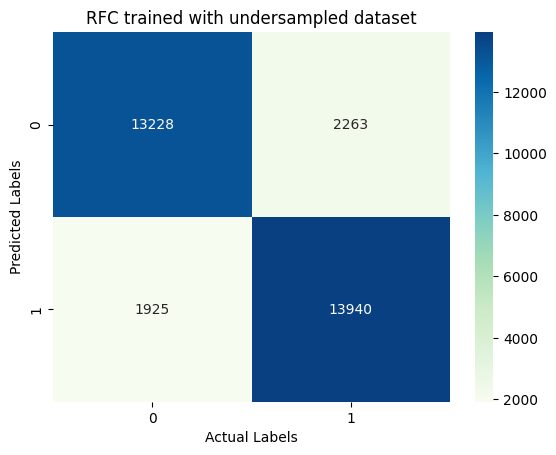

In [147]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='GnBu', fmt='g')
plt.title('RFC trained with undersampled dataset')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()

Another metric to consider measuring is the Area under the Reciever Operating Characteristic Curve - the ROC AUC score. The closer the score is to 1, the better a model's performance is with regards to the true positive rate vs the false positive rate. Our model scores 0.90 under this metric - a reasonably good score for a prediction model. An ROC AUC of 0.5 would suggest random guessing, telling us that our model has successfully learned from our input dataset.

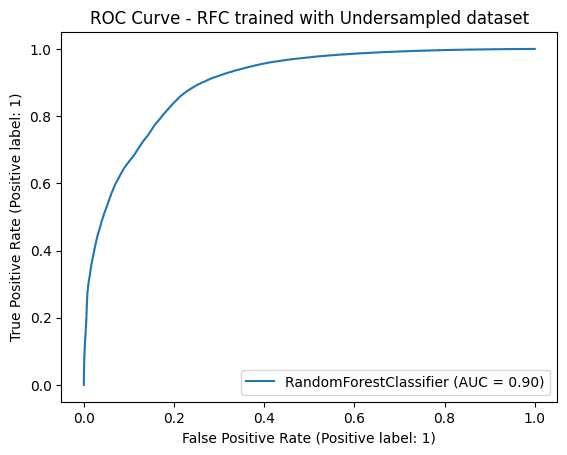

In [148]:
# Let's look at another performance metric - ROC AUC
# Our RFC trained with the undersampled dataset has an Area Under the Curve (AUC) score of its ROC Curve of 0.90 - which is very reasonable!
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rfc, features, target)
plt.title('ROC Curve - RFC trained with Undersampled dataset')
plt.show()